In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib_venn import venn3

In [ ]:
import pandas as pd
import os

# Kaggle API credentials (replace with your own credentials)
os.environ['KAGGLE_USERNAME'] = 'harinirayala'
os.environ['KAGGLE_KEY'] = '05f81d8548155ad1ce363b99fa9acc5d'

# Dataset download command
!kaggle datasets download -d shariful07/student-mental-health

# Extract the downloaded zip file
!unzip student-mental-health.zip

# Read the CSV file
data = pd.read_csv('Student Mental health.csv')  # Update with the actual CSV file name
data.head()

  0% 0.00/1.62k [00:00<?, ?B/s]
100% 1.62k/1.62k [00:00<00:00, 3.48MB/s]
Archive:  student-mental-health.zip
  inflating: Student Mental health.csv  


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
data.shape

(101, 11)

In [ ]:
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA', 'Marital Status', 'Depression', 'Anxiety', 'Panic Attack', 'Treatment']

In [ ]:
data.drop("Timestamp",axis=1,inplace=True)

In [ ]:
data.head(0)

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment


In [ ]:
data.isnull().sum()

Gender            0
Age               1
Course            0
Year of Study     0
CGPA              0
Marital Status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
dtype: int64

In [ ]:
data.duplicated().any()

False

In [ ]:
data.dropna(inplace=True)

In [ ]:
print(data.isnull().sum())
print("\n shape: ")
print(data.shape)

Gender            0
Age               0
Course            0
Year of Study     0
CGPA              0
Marital Status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
dtype: int64

 shape: 
(100, 10)


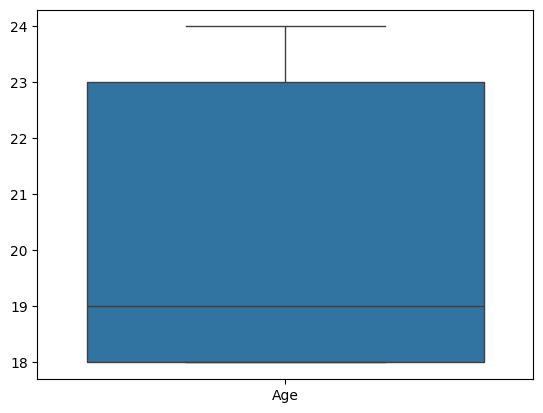

In [ ]:
#Now to deal with numerical outliers using boxplot
numerical_cols = data.select_dtypes(include='number').columns #filters numeric columns
sns.boxplot(data=data[numerical_cols])
plt.show()

In [ ]:
# Remove leading and trailing whitespaces in the 'CGPA' column
data['CGPA'] = data['CGPA'].str.strip()

In [ ]:
def convert_cgpa_range(cgpa_range):
    # Split the range into two values
    cgpa_values = cgpa_range.split('-')
    # Calculate the midpoint
    midpoint = (float(cgpa_values[0]) + float(cgpa_values[1])) / 2
    return midpoint

In [ ]:
# Apply the function to the 'CGPA' column
data['CGPA'] = data['CGPA'].apply(convert_cgpa_range)

# Check the unique values in the 'CGPA' column after conversion
print(data['CGPA'].unique())

[3.245 3.75  2.745 2.245 0.995]


In [ ]:
# Standardize the 'year of Study' column values and convert to numeric
data['Year of Study'] = data['Year of Study'].str.lower().str.replace('year', '').str.strip().map({'1': 1, '2': 2, '3': 3, '4': 4})

# Check the unique values in the 'year of Study' column after conversion
print(data['Year of Study'].unique())

[1 2 3 4]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          100 non-null    object 
 1   Age             100 non-null    float64
 2   Course          100 non-null    object 
 3   Year of Study   100 non-null    int64  
 4   CGPA            100 non-null    float64
 5   Marital Status  100 non-null    object 
 6   Depression      100 non-null    object 
 7   Anxiety         100 non-null    object 
 8   Panic Attack    100 non-null    object 
 9   Treatment       100 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.6+ KB


In [ ]:
binary_columns = ['Marital Status','Depression', 'Anxiety', 'Panic Attack', 'Treatment']
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})

In [ ]:
data.head()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,1,3.245,0,1,0,1,0
1,Male,21.0,Islamic education,2,3.245,0,0,1,0,0
2,Male,19.0,BIT,1,3.245,0,1,1,1,0
3,Female,22.0,Laws,3,3.245,1,1,0,0,0
4,Male,23.0,Mathemathics,4,3.245,0,0,0,0,0


In [ ]:
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [ ]:
course_mapping = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}
#since multiple entries of the same courses exist
#yet only differ in lettercase
data['Course'] = data['Course'].str.lower().str.strip().map(course_mapping)
data.Course.unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathematics',
       'BCS', 'Human Resources', 'IRKHS', 'Psychology', 'KENMS',
       'Accounting', 'ENM', 'Marine Science', 'KOE', 'Banking Studies',
       'Business Administration', nan, 'KIRKHS', 'Usuluddin', 'TAASL',
       'ALA', 'Biomedical Science', 'BENL', 'IT', 'CTS', 'Economics',
       'MHSC', 'MALCOM', 'KOP', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Fiqh', 'Nursing'], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder

#LABEL ECNODING
label_encoder = LabelEncoder()

# Apply label encoding to the 'Course' column
data['Course'] = label_encoder.fit_transform(data['Course'])

In [ ]:
print("Original Values:", label_encoder.classes_)
print("Encoded Labels:", label_encoder.transform(label_encoder.classes_))

Original Values: ['ALA' 'Accounting' 'BCS' 'BENL' 'BIT' 'Banking Studies'
 'Biomedical Science' 'Biotechnology' 'Business Administration' 'CTS'
 'Communication' 'Diploma Nursing' 'Diploma TESL' 'ENM' 'Economics'
 'Engineering' 'Fiqh' 'Fiqh Fatwa' 'Human Resources' 'Human Sciences'
 'IRKHS' 'IT' 'Islamic Education' 'KENMS' 'KIRKHS' 'KOE' 'KOP' 'Law'
 'MALCOM' 'MHSC' 'Marine Science' 'Mathematics' 'Nursing' 'Psychology'
 'Radiography' 'TAASL' 'Usuluddin' nan]
Encoded Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [ ]:
data.head()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
0,0,18.0,15,1,3.245,0,1,0,1,0
1,1,21.0,22,2,3.245,0,0,1,0,0
2,1,19.0,4,1,3.245,0,1,1,1,0
3,0,22.0,27,3,3.245,1,1,0,0,0
4,1,23.0,31,4,3.245,0,0,0,0,0


##EXPLORATORY DATA ANALYSIS

In [ ]:
column_names = data.columns
print(column_names)

Index(['Gender', 'Age', 'Course', 'Year of Study', 'CGPA', 'Marital Status',
       'Depression', 'Anxiety', 'Panic Attack', 'Treatment'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          100 non-null    int64  
 1   Age             100 non-null    float64
 2   Course          100 non-null    int64  
 3   Year of Study   100 non-null    int64  
 4   CGPA            100 non-null    float64
 5   Marital Status  100 non-null    int64  
 6   Depression      100 non-null    int64  
 7   Anxiety         100 non-null    int64  
 8   Panic Attack    100 non-null    int64  
 9   Treatment       100 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 8.6 KB


In [ ]:
data.describe()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.250000,20.53000,14.300000,1.980000,3.379900,0.160000,0.350000,0.340000,0.330000,0.060000
std,0.435194,2.49628,10.736043,0.994734,0.537567,0.368453,0.479372,0.476095,0.472582,0.238683
min,0.000000,18.00000,0.000000,1.000000,0.995000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,4.000000,1.000000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,15.000000,2.000000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,23.00000,22.250000,3.000000,3.750000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,37.000000,4.000000,3.750000,1.000000,1.000000,1.000000,1.000000,1.000000


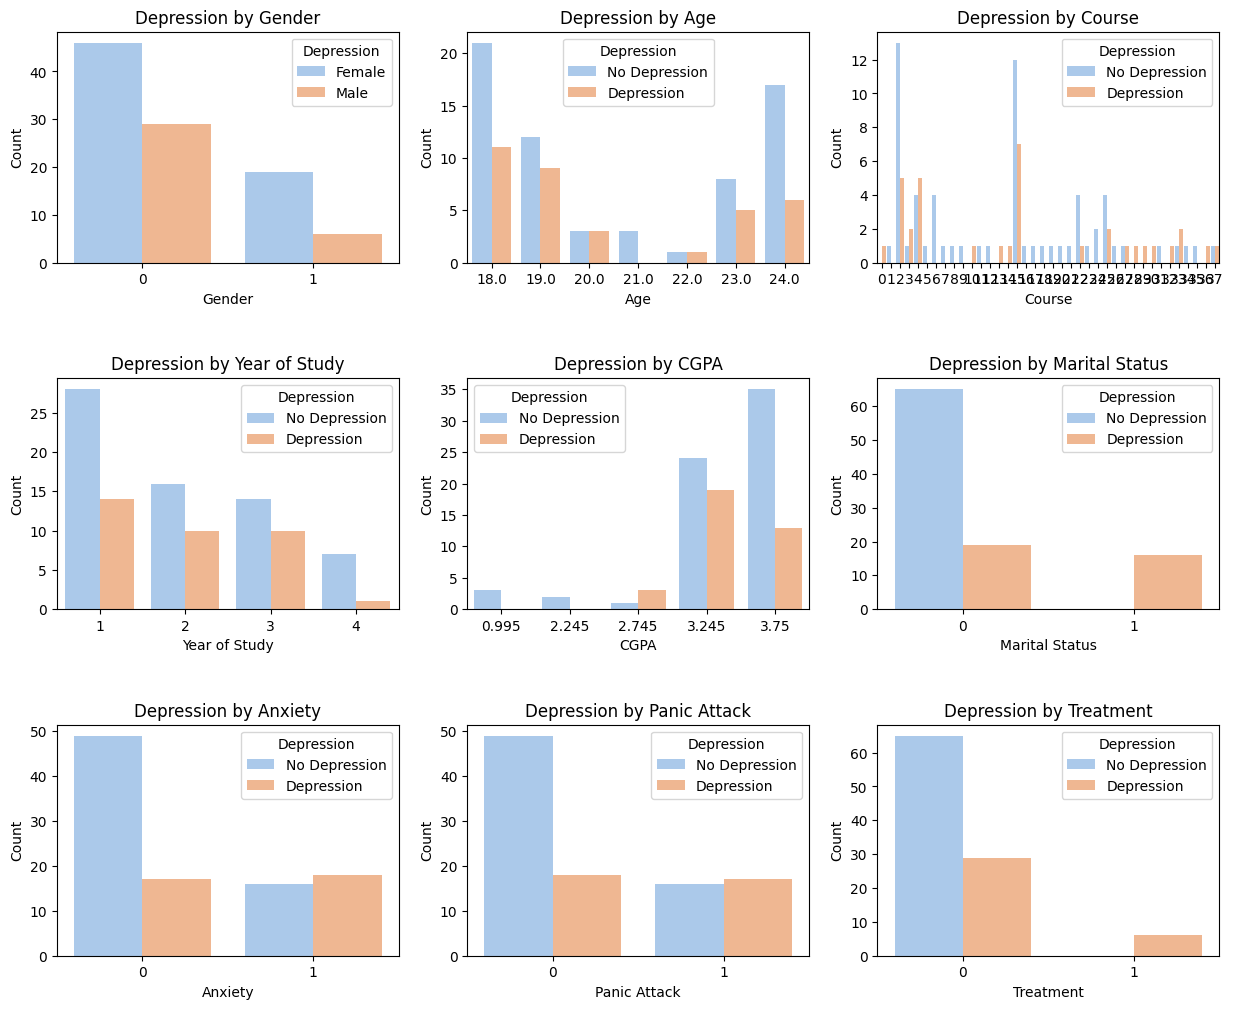

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns of interest
columns_of_interest = ['Gender', 'Age', 'Course', 'Year of Study', 'CGPA', 'Marital Status', 'Anxiety', 'Panic Attack', 'Treatment']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Visualize the relationship between "Depression" and other fields
for i, column in enumerate(columns_of_interest):
    row, col = divmod(i, 3)

    # Bar plot
    sns.countplot(data=data, x=column, hue='Depression', palette='pastel', ax=axes[row, col])
    axes[row, col].set_title(f'Depression by {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

    # Customize legend for 'Gender'
    if column == 'Gender':
        axes[row, col].legend(title='Depression', labels=['Female', 'Male'])

    # Add legend for other columns
    else:
        axes[row, col].legend(title='Depression', labels=['No Depression', 'Depression'])

# Show the plots
plt.show()


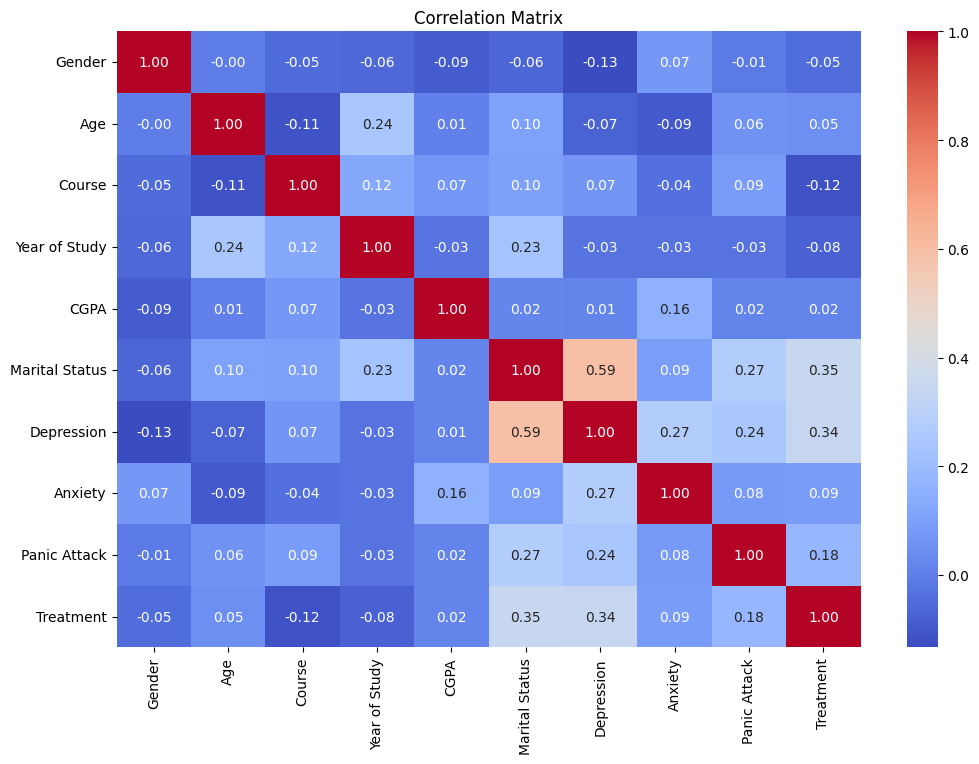

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data['CGPA'].unique()

array([3.245, 3.75 , 2.745, 2.245, 0.995])

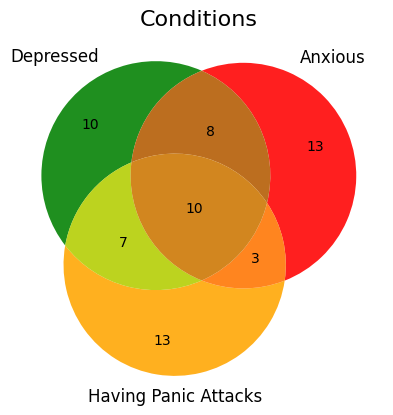

In [ ]:
depressed = data[(data["Depression"] == 1)]
anxious = data[(data["Anxiety"] == 1)]
panicking = data[(data["Panic Attack"] == 1)]

venn3(subsets = [set(depressed.index),
                 set(anxious.index),
                 set(panicking.index)],
      set_labels = ("Depressed", "Anxious", "Having Panic Attacks"),
      set_colors = ("Green", "Red", "Orange"),
      alpha = 0.878)

plt.title("Conditions", fontsize = 16)
plt.show()

##MACHINE LEARNING / MODEL TRAINING

###RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#Setting target
X = data.drop(['Depression'], axis=1)
y = data['Depression']

In [ ]:
X.head()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Anxiety,Panic Attack,Treatment
0,0,18.0,15,1,3.245,0,0,1,0
1,1,21.0,22,2,3.245,0,1,0,0
2,1,19.0,4,1,3.245,0,1,1,0
3,0,22.0,27,3,3.245,1,0,0,0
4,1,23.0,31,4,3.245,0,0,0,0


In [ ]:
#Selecting machine learning model
model = RandomForestClassifier(random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [ ]:
# Change hyperparameters to increase accuracy
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [5]
}

In [ ]:
#Setting target
X = data.drop(['Depression', 'Gender','Age'], axis=1)
y = data['Depression']

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using Grid Search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [2], 'n_estimators': [50]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

#Print our results
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.75


###KNN

In [ ]:
#Setting target
X = data.drop(['Depression'], axis=1)
y = data['Depression']

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)
model_knn = KNeighborsClassifier()

In [ ]:
# Define KNN hyperparemeters
param_grid_knn = {
    'knn__n_neighbors': [5],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [2]
}

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Choosing model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_knn, y_train_knn)

y_pred_knn = model_knn.predict(X_test_knn)

# Evaluate the model's accuracy
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

#Printing results
print(f"Accuracy for KNN: {accuracy_knn:.2f}")

Accuracy for KNN: 0.45


In [ ]:
#Setting target
X = data.drop(['Depression', 'Gender','Age'], axis=1)
y = data['Depression']

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pipeline with scaling and KNN
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', model_knn)])

In [ ]:
# Grid Search for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)

# Train the model using Grid Search
grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [5], 'knn__p': [2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_

# Print the best hyperparameters for KNN
print("Best Hyperparameters for KNN:", best_params_knn)

Best Hyperparameters for KNN: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}


In [ ]:
# Use the best model for predictions
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test_knn)

In [ ]:
# Evaluate the model's accuracy
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

In [ ]:
#Printing results
print(f"Accuracy for KNN: {accuracy_knn:.2f}")

Accuracy for KNN: 0.85


In [ ]:
import pickle

In [ ]:
filename = 'STUDENT_MENTAL_HEALTH.sav'
pickle.dump(best_model_knn, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('STUDENT_MENTAL_HEALTH.sav', 'rb'))

In [ ]:
X.head()

,Course,Year of Study,CGPA,Marital Status,Anxiety,Panic Attack,Treatment
0,15,1,3.245,0,0,1,0
1,22,2,3.245,0,1,0,0
2,4,1,3.245,0,1,1,0
3,27,3,3.245,1,0,0,0
4,31,4,3.245,0,0,0,0
